In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import pydot as pyd

## Predicciones correctas por cada clase

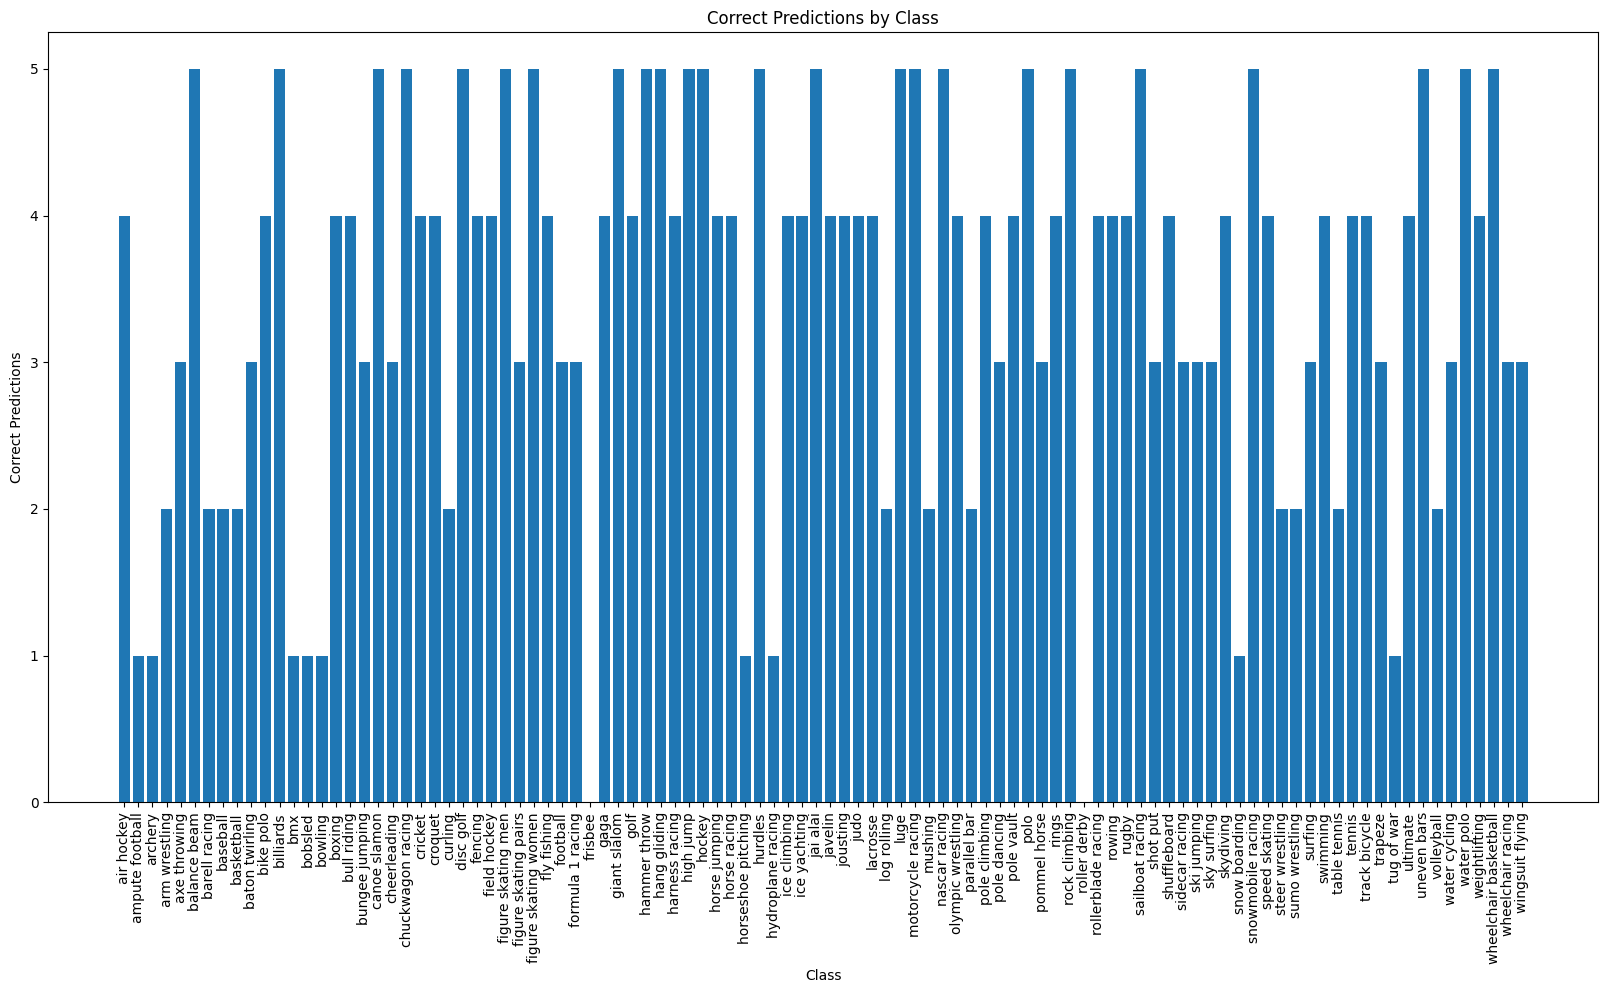

In [2]:
correct_by_class_model7 = pd.read_csv('correct_by_class_model7.csv')

# plot histogram of correct predictions by class
plt.figure(figsize=(20, 10))
plt.bar(correct_by_class_model7['labels'], correct_by_class_model7['correct'])
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Correct Predictions')
plt.title('Correct Predictions by Class')
plt.show()

## Carga de imagenes

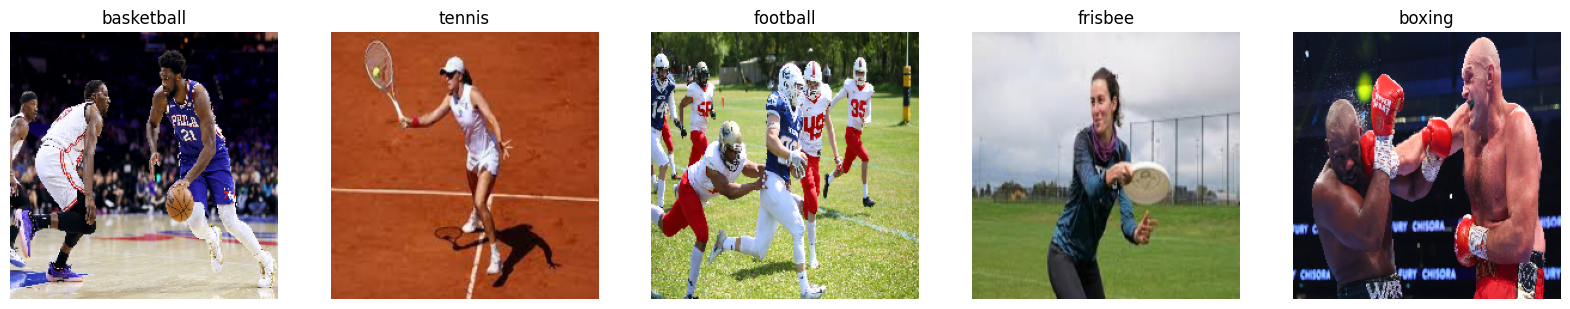

In [3]:
csv_data = pd.read_csv('sports.csv')

grouped_by_id_label = csv_data.groupby(['class id', 'labels']).size().reset_index(name='counts') 

class_dictionary = dict(zip(grouped_by_id_label['class id'], grouped_by_id_label['labels']))

sports = ['basketball', 'tennis', 'football', 'frisbee', 'boxing']
basketball = plt.imread('wrapper_photos/basketball.jpg')
tennis = plt.imread('wrapper_photos/tennis.jpg')
images = []
for sport in sports:
    image = plt.imread('wrapper_photos/' + sport + '.jpg')
    image = cv2.resize(image, (224, 224))
    images.append(image)

# Plot image examples
plt.figure(figsize=(20, 10))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(sports[i])



## Clasificación de imagenes

In [4]:
model = keras.models.load_model('sports_7.h5')
classification = model.predict(np.array(images))
classification = np.argmax(classification, axis=1)
print("Numeros de clase:", classification)
print("Real", sports)
print("Predict:", [class_dictionary[i] for i in classification])

iamnge = keras.utils.plot_model(model, "model.png", show_shapes = True,)
print(iamnge)

1/1 [==============================] - 0s 341ms/step
Numeros de clase: [ 8 87 31 36 15]
Real ['basketball', 'tennis', 'football', 'frisbee', 'boxing']
Predict: ['basketball', 'tennis', 'football', 'golf', 'boxing']
<IPython.core.display.Image object>
